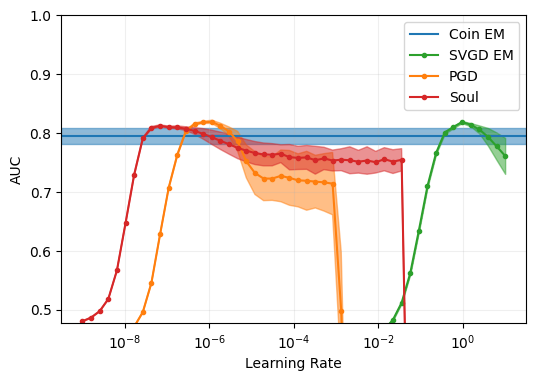

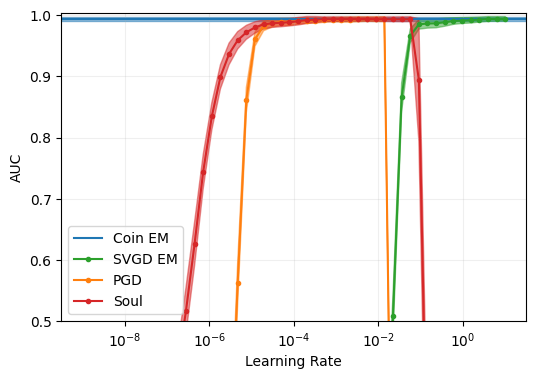

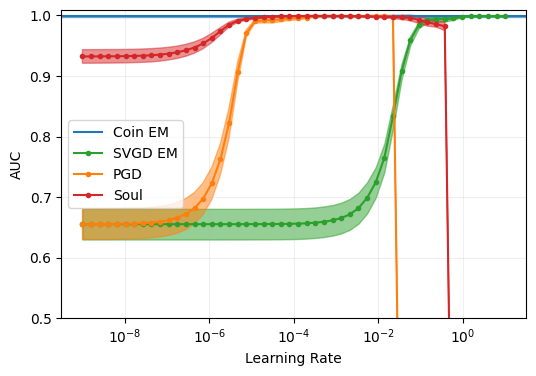

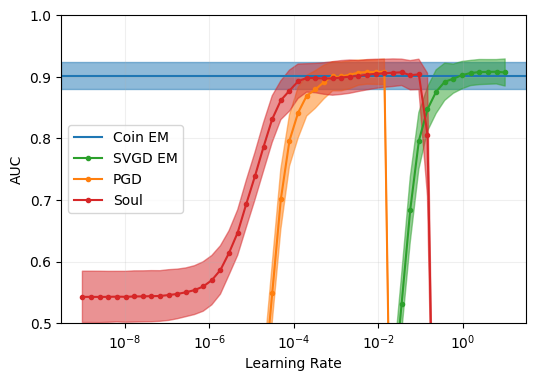

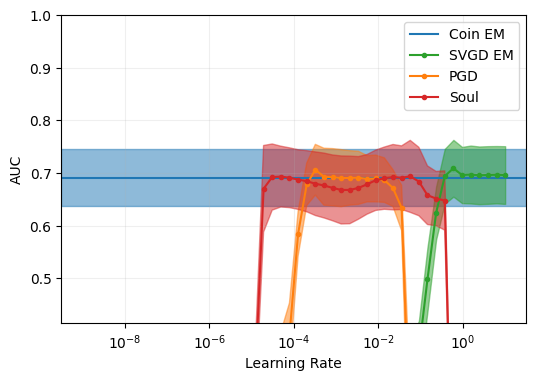

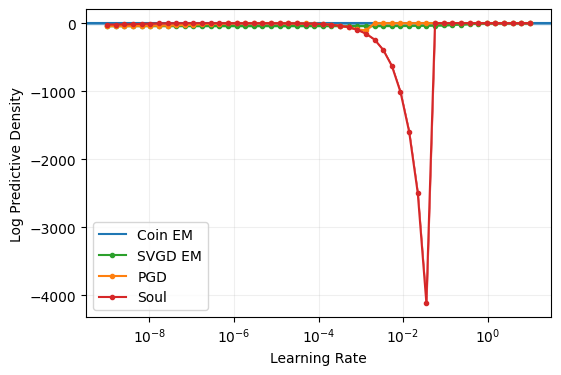

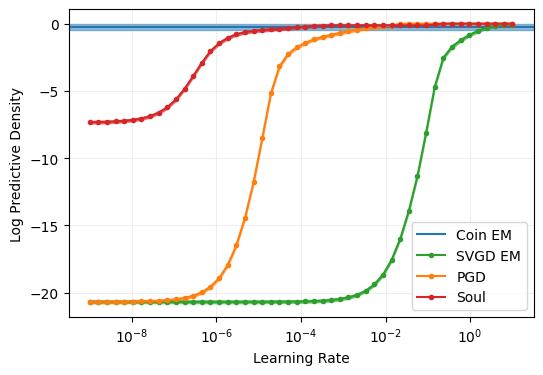

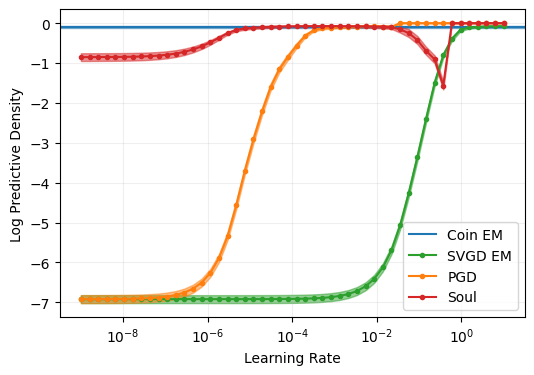

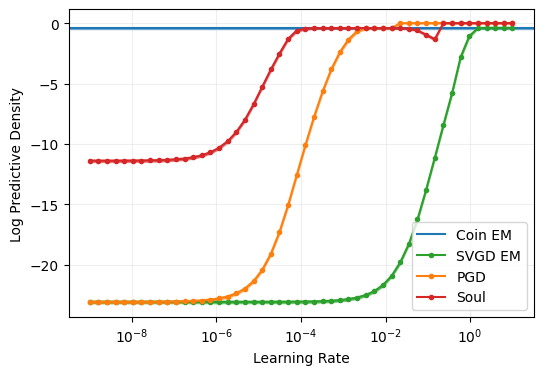

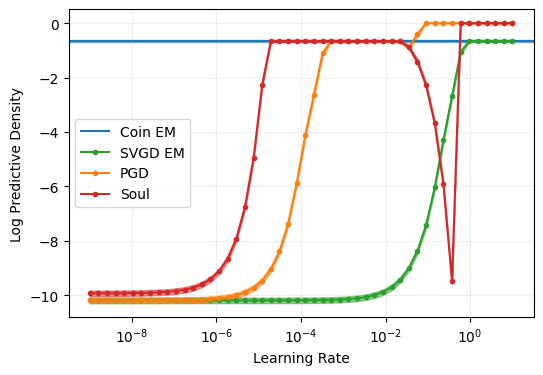

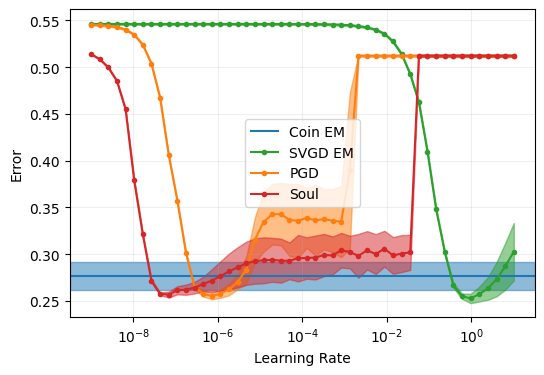

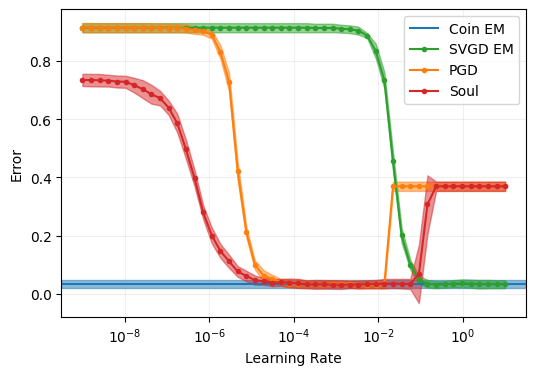

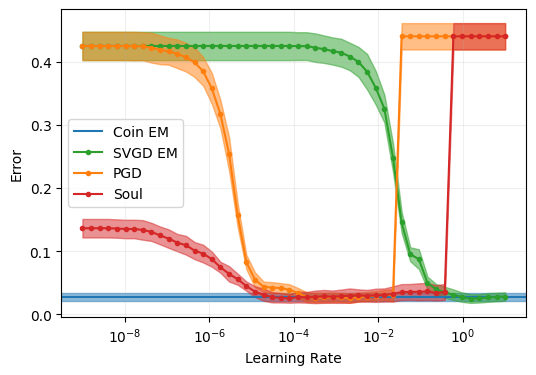

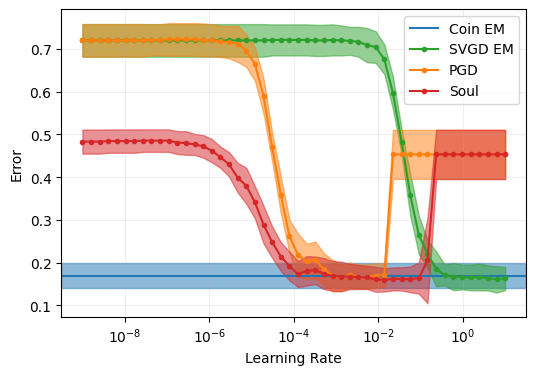

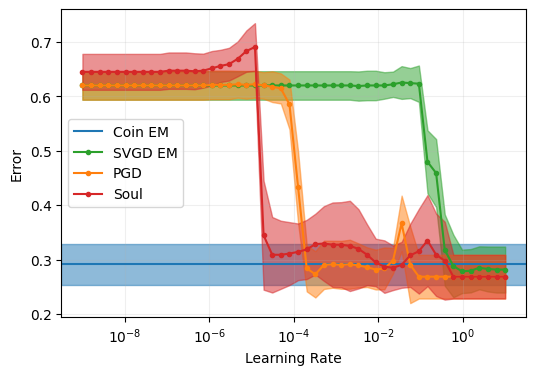

In [36]:
import jax.numpy as jnp
import jax.random as jr
from jax import vmap

import pickle

import matplotlib.pyplot as plt


for metric in ["auc", "lppd", "error"]:

    for name in ["Covertype", "Wisconsin", "Banknote", "Cleveland", "Haberman"]:

        with open(f"results/{name}.pkl","rb") as f:
            data = pickle.load(f)



        coin = jnp.nan_to_num(jnp.array(data[metric]["coin_svgd"])) # Repetitions, by iterations
        ada = jnp.nan_to_num(jnp.array(data[metric]["ada_svgd"]).reshape((-1, 50))) # Learnrates, by repetitions
        pgd = jnp.nan_to_num(jnp.array(data[metric]["pgd"]).reshape((-1, 50))) # Learnrates, by repetitions
        soul = jnp.nan_to_num(jnp.array(data[metric]["soul"]).reshape((-1, 50))) # Learnrates, by repetitions

        step_sizes = data["step_sizes"]

        thresh = 0.1

        fig, ax = plt.subplots(figsize=(6, 4))

        # Plot coin
        ax.axhline(coin.mean(axis=0), label="Coin EM", color ="C0")
        ax.axhspan(coin.mean(axis=0) - coin.std(axis=0), coin.mean(axis=0) + coin.std(axis=0), alpha=0.5, color = "C0")

        # Plot ada
        ax.plot(step_sizes, ada.mean(axis=0), ".-", label='SVGD EM', color="C2")
        ax.fill_between(step_sizes, ada.mean(axis=0) - jnp.minimum(ada.std(axis=0), thresh), ada.mean(axis=0) + jnp.minimum(ada.std(axis=0), thresh), alpha=0.5 , color="C2")

        # Plot pgd
        ax.plot(step_sizes, pgd.mean(axis=0), ".-", label='PGD', color="C1")
        ax.fill_between(step_sizes, pgd.mean(axis=0) - jnp.minimum(pgd.std(axis=0), thresh), pgd.mean(axis=0) + jnp.minimum(pgd.std(axis=0), thresh), alpha=0.5, color="C1")

        # Plot soul
        ax.plot(step_sizes, soul.mean(axis=0), ".-", label='Soul', color="C3")
        ax.fill_between(step_sizes, soul.mean(axis=0) - jnp.minimum(soul.std(axis=0), thresh), soul.mean(axis=0) + jnp.minimum(soul.std(axis=0), thresh), alpha=0.5, color="C3")

        if metric == "auc":
            plt.ylim(0.6 * coin.mean(), 1.01 * coin.mean())
            plt.ylabel('AUC')
            plt.yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

        elif metric == "lppd":
            #plt.ylim(0.5 * coin.mean(), 1.2 * coin.mean())
            plt.ylabel('Log Predictive Density')

        elif metric == "error":
            #plt.ylim(0.5 * coin.mean(), 1.04 * coin.mean())
            plt.ylabel('Test accuracy')

        plt.xscale('log')
        # 
        plt.xlabel('Learning Rate')
            
        plt.legend()
        plt.grid(True, which="both", ls="-", alpha=0.2)

        plt.savefig(f"results/{name}_{metric}.pdf", bbox_inches='tight')